# Problem Statement

This notebook explores the housing dataset from Kaggle with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The data has been seperated into trainig set and test set. The goal is to predict the final Sale price of the houses in the test data set.

In [1221]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1222]:
#loading the data
df_train = pd.read_csv("train.csv")

# Exploratory Data-Analysis

In [1223]:
#information aobut the dataframe
print(f"Rows: {df_train.shape[0]}, Column:{df_train.shape[1]}")
df_train.head()

Rows: 1460, Column:81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1224]:
#getting info about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#there are both numerical and categorical features. couple of missing values. 

In [1225]:
#describing numerical features
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1226]:
#describing categorical features
df_train.describe(include = "object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Detecting and imputing missing values 

In [1227]:
#Detecting missing values of numerical columns

#sorting missing values in descending order.
missing_data = df_train.isnull().sum().sort_values(ascending = False)

#getting the percentage of missng data in each column in a descending order. 
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

#concatanating the missng colums and their percentage
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])

#showing only first 20 rows of missing data to get a general idea
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [1228]:
#drop poolQC, Miscfeature, Alley, Fence, FireplaceQu, LotFrontage??

In [1229]:
column_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage' ]

In [1230]:
df_train = df_train.drop(columns = column_to_drop)

In [1231]:
#Detecting missing values of numerical columns

#sorting missing values in descending order.
missing_data = df_train.isnull().sum().sort_values(ascending = False)

#getting the percentage of missng data in each column in a descending order. 
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

#concatanating the missng colums and their percentage
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])

#showing only first 20 rows of missing data to get a general idea
missing_data.head(20)

,Total,Percent
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


In [1232]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1233]:
#taking care of missing values with sklearn 
# from sklearn.impute import SimpleImputer
# categorical_columns = df_train.select_dtypes(include='object').columns
# numeric_columns = df_train.select_dtypes(include = 'number').columns
# imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')
# df_train[numeric_columns] = imputer_numerical.fit_transform(df_train[numeric_columns])
# imputer_categorical = SimpleImputer(fill_value='NaN', strategy='most_frequent')
# df_train[categorical_columns] = imputer_categorical.fit_transform(df_train[categorical_columns])
# print(df_train[numeric_columns].isnull().sum().sort_values(ascending = False))
# print(df_train[categorical_columns].isnull().sum().sort_values(ascending = False))


In [1234]:
#imputing missing values with mean for the numerical columns using pandas.

#selecting only the numeric columns
numeric_columns = df_train.select_dtypes(include = 'number').columns
# Check initial missing values
print("Missing values before imputation:")
print(df_train[numeric_columns].isnull().sum().sort_values(ascending = False))


#Impute missing vlaues with mean
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())

# Check missing values after imputation
print("\nMissing values after imputation:")
print(df_train[numeric_columns].isnull().sum())


Missing values before imputation:
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

Missing values after imputation:
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinS

In [1235]:
#imputing missing values with NAN for the cateogrical columns using pandas.

#selecting only the numeric columns
categorical_columns = df_train.select_dtypes(include = 'object').columns
# Check initial missing values
print("Missing values before imputation:")
print(df_train[categorical_columns].isnull().sum().sort_values(ascending = False))

#Impute missing vlaues with mean
df_train[categorical_columns] = df_train[categorical_columns].fillna('NAN')

# Check missing values after imputation
print("\nMissing values after imputation:")
print(df_train[categorical_columns].isnull().sum())



Missing values before imputation:
GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
Heating           0
MSZoning          0
HeatingQC         0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
Foundation        0
Street            0
ExterCond         0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleCondition     0
dtype: int64

Missing values after imputation:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Conditi

In [1236]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [1237]:
df_train.shape

(1460, 75)

# Detecting and taking care of outliers

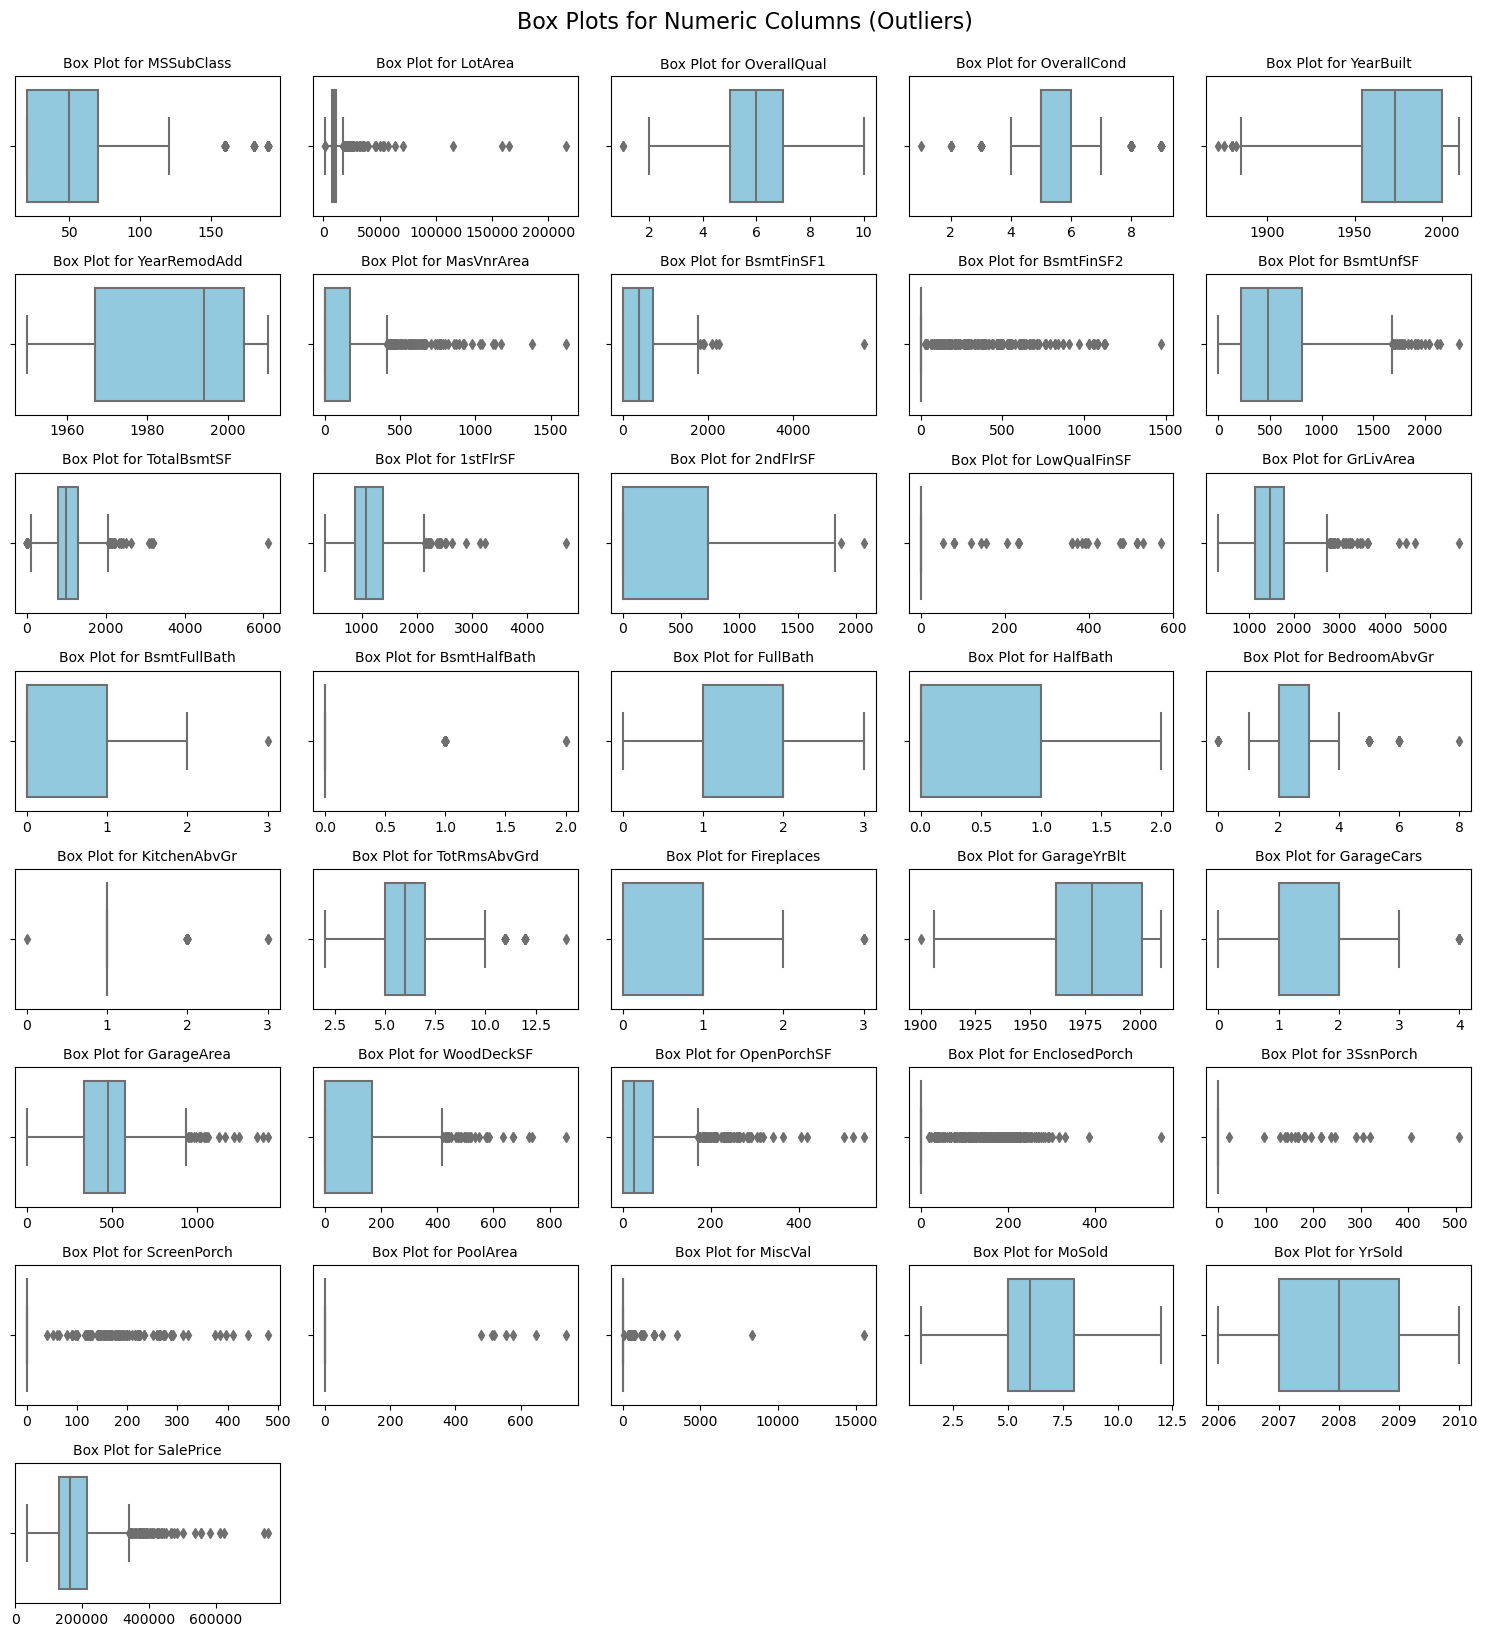

In [1238]:
#detecting outliers
# Select only numerical features
numerical_features = df_train.select_dtypes(include=['number']).drop(columns="Id")

# Calculate the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=numerical_features[column], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Box Plot for {column}', fontsize=10)
        axes[i].set_xlabel('')  # Remove x-axis label for better clarity

# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.suptitle('Box Plots for Numeric Columns (Outliers)', y=1.02, fontsize=16)
plt.show()


In [1239]:
#creating a function that takes care of the outliers in IQR method
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[col]>upper,col)]=upper
    dataframe.loc[(dataframe[col]<lower,col)]=lower 
    # np.where(condition, if True excute this, NO excute this)
    # dataframe[column] = np.where((dataframe[column] < lower) | (dataframe[column] > upper), dataframe[column].median(), dataframe[column])
    return dataframe

#dropping id and salesprice and removing the outliers from other numerical features
#might come back later to add salesprice to see if the model improves.
# columns_to_drop = ['Id', 'SalePrice']
columns_to_drop = ['Id']
for col in df_train.drop(columns=columns_to_drop).select_dtypes(include=["number"]).columns :
    df_train = handle_outliers_iqr(df_train, col)

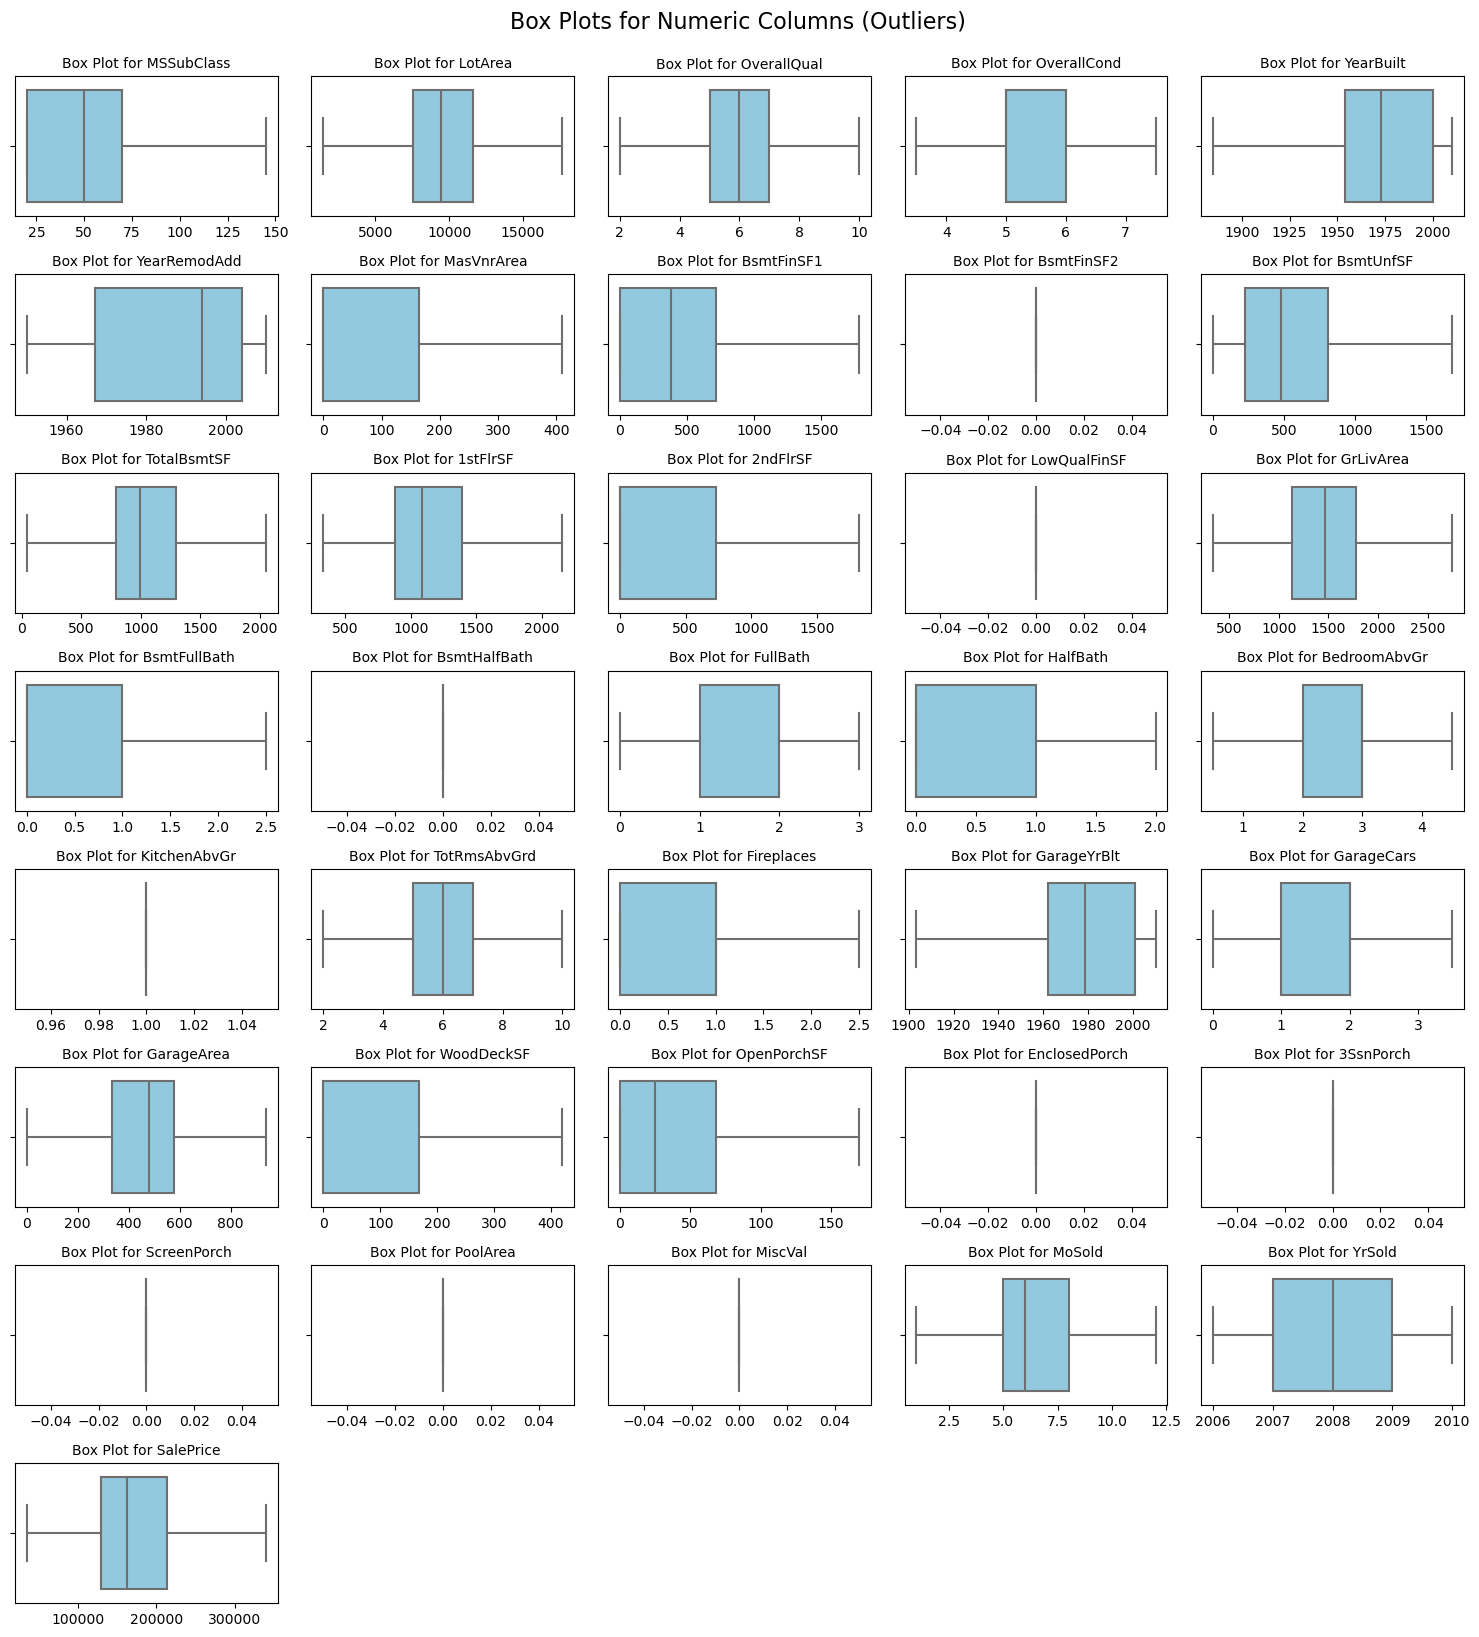

In [1240]:
#after removing outliers
# Select only numerical features
numerical_features = df_train.select_dtypes(include=['number']).drop(columns="Id")

# Calculate the number of rows and columns for the grid layout
num_features = len(numerical_features.columns)
num_rows = 8  # Set the number of rows
num_cols = 5  # Set the number of columns

# Calculate the figure size based on the number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=numerical_features[column], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Box Plot for {column}', fontsize=10)
        axes[i].set_xlabel('')  # Remove x-axis label for better clarity

# Remove empty subplots (8*5 = 40 but we have only 37 features to plot)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.suptitle('Box Plots for Numeric Columns (Outliers)', y=1.02, fontsize=16)
plt.show()


In [1241]:
df_train.shape

(1460, 75)

# Detecting and taking care of features with weak correlation

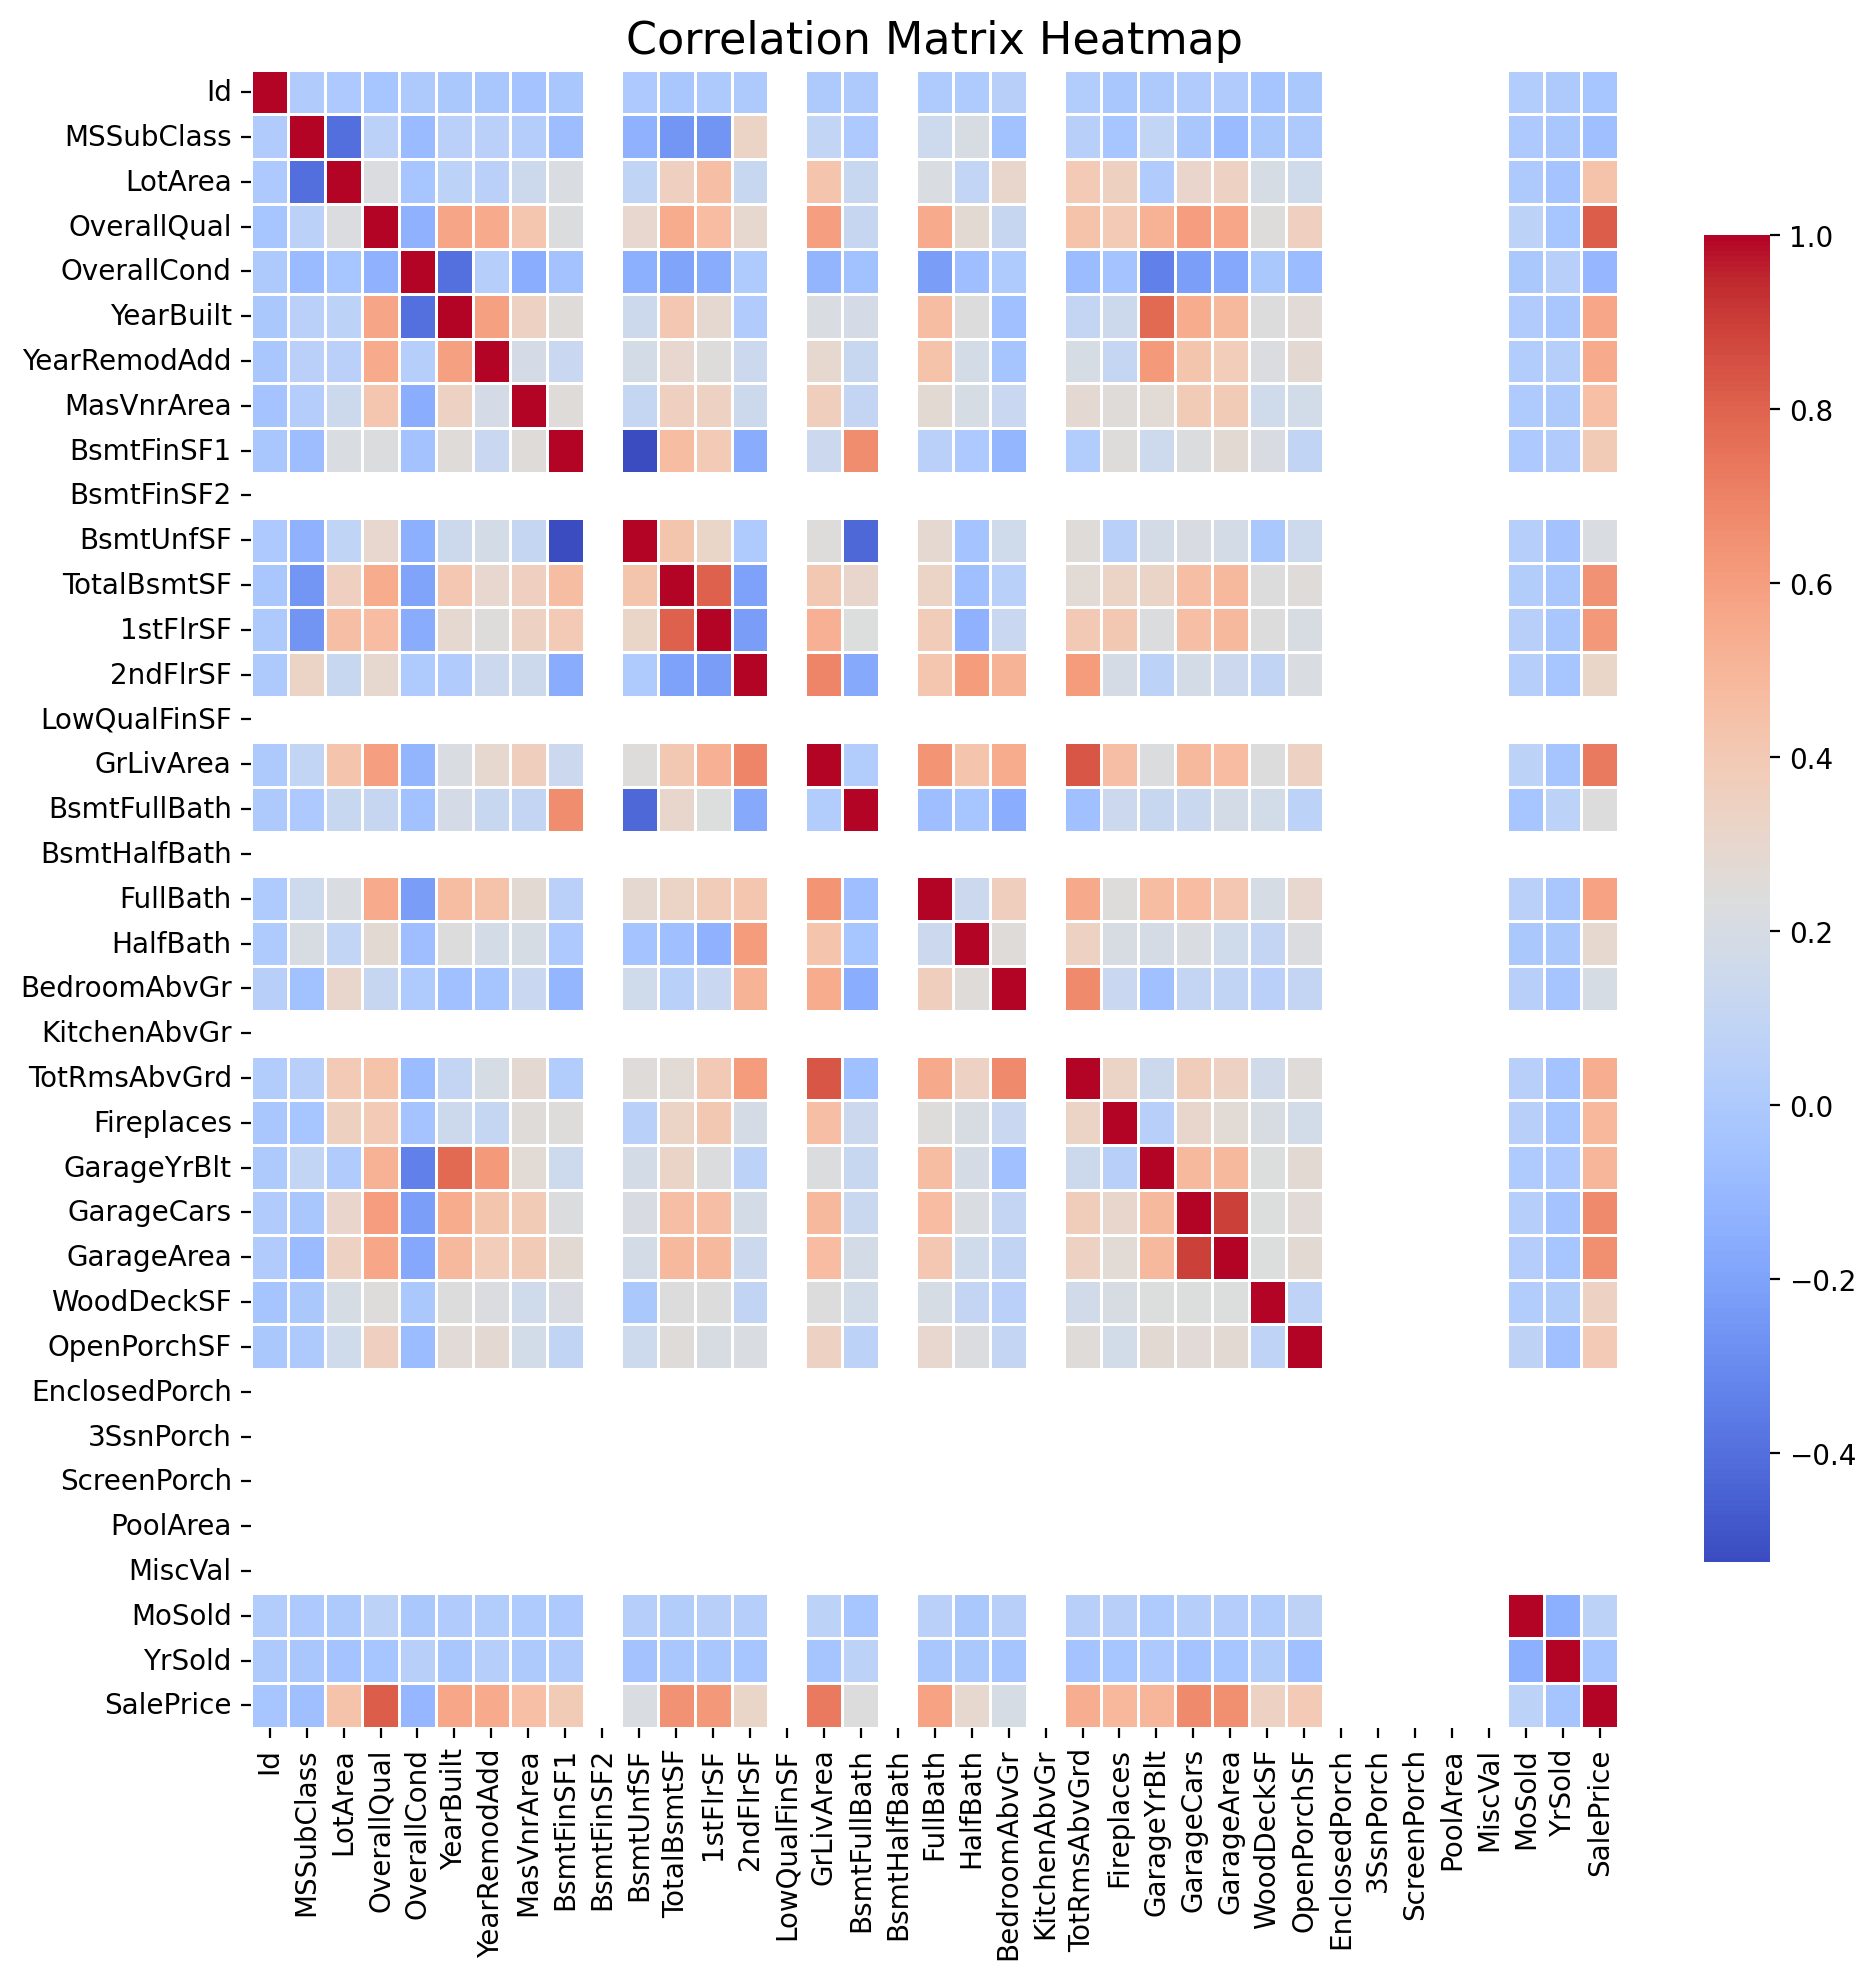

In [1242]:
# Calculate the correlation matrix
corr = df_train.corr(numeric_only=True)

# Set up the figure size and resolution
plt.figure(figsize=(10, 10), dpi=200)

# Create a heatmap for the correlation matrix without annotations
sns.heatmap(corr, cmap="coolwarm", linewidths=.5, cbar_kws={"shrink": 0.8})

# Adjust layout
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [1243]:
def drop_weak_correlation_columns(dataframe, threshold=0.5):
    """
    Drop columns with weak correlation to the target variable.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - threshold (float): The correlation threshold. Columns with absolute correlation
                        less than this threshold will be dropped. Defaults to 0.5.

    Returns:
    - pd.DataFrame: DataFrame with weakly correlated columns dropped.
    """

    # Calculate the correlation matrix for numeric columns
    correlation_matrix = dataframe.corr(numeric_only=True)

    # Select the target variable (assuming it's the last column)
    target_column = correlation_matrix.columns[-1]

    # Identify weakly correlated columns
    weak_columns = correlation_matrix[abs(correlation_matrix[target_column]) < threshold].index

    # Drop weakly correlated columns
    dataframe_filtered = dataframe.drop(columns=weak_columns)

    return dataframe_filtered

# Example usage:
# Assuming your DataFrame is named 'df_train'
# Replace 'df_train' with the actual name of your DataFrame

# Example: df_train = pd.read_csv('your_data.csv')

# Drop weakly correlated columns with a threshold of 0.5
df_train_filtered = drop_weak_correlation_columns(df_train, threshold=0.5)
# df_train = drop_weak_correlation_columns(df_train, threshold=0.5)

# Display the original and filtered DataFrame shapes
print("Original DataFrame shape:", df_train.shape)
print("DataFrame shape after dropping weakly correlated columns:", df_train_filtered.shape)

#have to comeback later for experimenting. 

Original DataFrame shape: (1460, 75)
DataFrame shape after dropping weakly correlated columns: (1460, 59)


# Getting categorical Data into shape


In [1244]:
#applying lablel encoding to convert objects.
categorical_columns = df_train.select_dtypes(include = 'object').columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for cols in categorical_columns.values.flatten():
    df_train[cols] = encoder.fit_transform(df_train[cols])

In [1245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

##### will train a multiple regression model and measure the accuracy with the following metrics:
##### mean squared error, mean absolute error, root mean squared error for comparig with other models. R-squared error(ranges from 0 to 1, 1 means perfect predicition),accuracy provided by scikitlearn
##### Also use cross validation score to measure bias and variance

# Model Building and scaling

### Linear Regression

##### Splitting into train-test split

In [1246]:
from sklearn.model_selection import train_test_split

#split data into independent and dependent variable
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

##### Feature Scaling (Experiment)

In [1247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)

#train and test is completely seperated from each other. That is why fit_transform will be applied to training set and only transform will be appplied to test set to get the same scaling.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [1248]:
#imporitng libraries for cross validation, mae, msee, r2e
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression



In [1249]:
#cross vlaidation score
cv = KFold(n_splits=5, shuffle=True, random_state=42) #the data will be split into 5 subsets. one subset will be used for validation and others will be used for training during each iteratoin. 
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print(f"Cross validaiton scores: {cv_scores}")
print(f"Mean cross validation score: {cv_scores.mean()}")

Cross validaiton scores: [ 8.88488117e-01  8.68242936e-01 -7.72352276e+23  8.95662550e-01
  8.76847118e-01]
Mean cross validation score: -1.5447045521479154e+23


In [1250]:
# create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [1251]:
# score for train 
print(f"train score: {model.score(X_train, y_train)}")
# score for test 
print(f"test score: {model.score(X_test, y_test)}")

train score: 0.897169086649332
test score: 0.8988537319031653


In [1252]:
# final accuracy 
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.8988537319031653


#### K-nn regressor

In [1253]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the k-Nearest Neighbors regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Cross-validation
cv_mse = -cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = -cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(knn_regressor, X, y, cv=5, scoring='r2')

print('\nCross-validated scores:')
print(f'CV Mean Squared Error (MSE): {cv_mse.mean():.2f}')
print(f'CV Mean Absolute Error (MAE): {cv_mae.mean():.2f}')
print(f'CV R-squared (R2): {cv_r2.mean():.2f}')

Mean Squared Error (MSE): 734344007.32
Mean Absolute Error (MAE): 18891.16
R-squared (R2): 0.85

Cross-validated scores:
CV Mean Squared Error (MSE): 1373779720.30
CV Mean Absolute Error (MAE): 27483.38
CV R-squared (R2): 0.69
